# Sklearn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一组2次函数关系的数据，并且包含一定的噪音
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

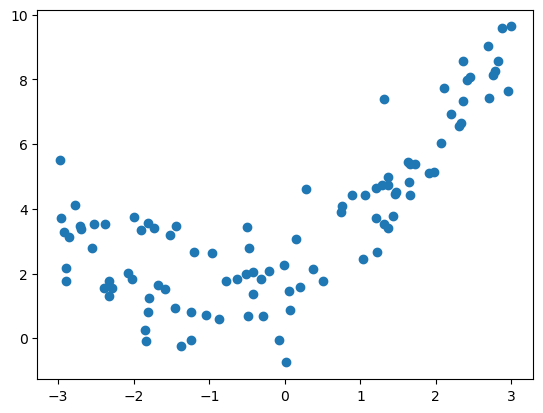

In [2]:
plt.scatter(x, y)
# 显然是非线性的关系
plt.show()

sklearn中，将给数据添加特征的功能封装在了preprocessing中，多项式回归本身也只是预处理的过程

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2) # degree：对原本的数据集添加最多几次幂的特征
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
X2[:5, :]

array([[1.        , 1.20262273, 1.44630143],
       [1.        , 2.06511986, 4.26472002],
       [1.        , 1.05908602, 1.12166319],
       [1.        , 1.36714834, 1.86909459],
       [1.        , 2.70874774, 7.33731434]])

第一列加入的是X的0次方。第二列就是X的一次方，第三列是X的平方

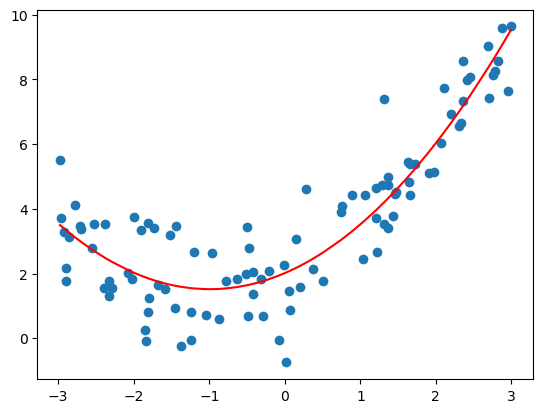

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X2, y)
y_predict = lin_reg.predict(X2)

plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r") 
plt.scatter(x, y)
plt.show()

In [8]:
lin_reg.coef_ # 0次方的系数是0.

array([0.        , 1.00211316, 0.50409402])

In [9]:
lin_reg.intercept_

2.0153101519246723

In [10]:
lin_reg.score(X2, y)

0.8196892855998191

### 关于Polynomial Features

In [11]:
# 多维特征的多项式化：
X = np.arange(1, 11).reshape(-1, 2)

In [12]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [13]:
X.shape

(5, 2)

In [14]:
poly=PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [15]:
X2.shape

(5, 6)

注意列数，从2变成了6

In [16]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

1. 第0列还是X的0次方
2. 第1，第2列是原先的X
3. 第3，第5列，对应原先矩阵的第0，1列的平方
4. 第4列是原先矩阵的两个列的积

In [17]:
poly=PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)

In [18]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

$$
\begin{align}
degree &= 3 \\
x_1, x_2 \rightarrow &1, x_1, x_2 \\
& x_1^2, x_2^2, x_1 \cdot x_2\\
& x_1^3, x_2^3, x_1^2\cdot x_2, x_1 \cdot x_2^2
\end{align}
$$

样本的特征数将以指数级增长。

### Pipeline
使用多项式回归时的流程：  
1. 使用原数据生成多项式项
2. 如果degree特别大，就会导致数据偏斜，就需要数据归一化
3. 送入模型

使用pipeline这个东西就可以把上述的三个步骤合为一体，不需要不停的重复这三步

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

poly_reg = Pipeline([
    ("Poly", PolynomialFeatures(degree=2)), # 流程的名称 + 流程这一步需要用的类的实例
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
]) # 把每一个步骤对应的类合成一个列表，传入pipline
# 送给poly_reg的数据就会沿着这个管道，流入三个实例，再从实例被输出给下一个实例

In [20]:
poly_reg.fit(X, y)

Pipeline(steps=[('Poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [21]:
y_predict = poly_reg.predict(X)

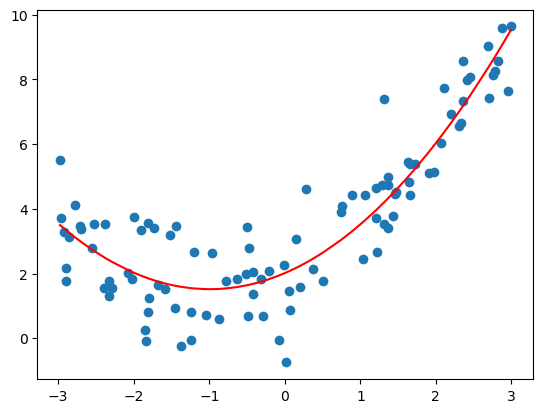

In [22]:
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r") 
plt.scatter(x, y)
plt.show()